___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

**Data vocabulary:**

    1. #3 (age): age in years 
    2. #4 (sex): sex (1 = male; 0 = female) 
    3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
    4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
    5. #12 (chol): serum cholestoral in mg/dl 
    6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    8. #32 (thalach): maximum heart rate achieved 
    9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
    10. #40 (oldpeak): ST depression induced by exercise relative to rest 
    11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
    12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
    13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
    14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,6)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', None)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

# Ingest the data to notebook

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Duplicate value control**

In [4]:
df.duplicated().sum()

1

**We have one duplicate observation. We dropped it and reset dataframe index**

In [5]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


**Although all our features are numerical, we have separated them categorically and numerically according to the values they take. We did not include the "target" column here, we will consider it separately**

In [8]:
cat =["sex","cp","fbs","restecg","exang","slope","thal"]
num =["age","trestbps","chol","thalach","oldpeak"]

**Shape control**

In [9]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 target variable')

 We have 302 instances with the 13 features and 1 target variable


**Missing value control**

In [10]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
age,0,0.000
sex,0,0.000
cp,0,0.000
trestbps,0,0.000
chol,0,0.000
fbs,0,0.000
restecg,0,0.000
thalach,0,0.000
exang,0,0.000
oldpeak,0,0.000


**Statistic insight on the numerical columns**

In [11]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.000,54.421,9.048,29.000,48.000,55.500,61.000,77.000
trestbps,302.000,131.603,17.563,94.000,120.000,130.000,140.000,200.000
chol,302.000,246.500,51.753,126.000,211.000,240.500,274.750,564.000
thalach,302.000,149.570,22.904,71.000,133.250,152.500,166.000,202.000
oldpeak,302.000,1.043,1.161,0.000,0.000,0.800,1.600,6.200


**Checking distribution curve skew of numeric columns**

In [12]:
df[num].skew()

age        -0.204
trestbps    0.717
chol        1.147
thalach    -0.533
oldpeak     1.266
dtype: float64

**Checking histogram plot of numeric columns**

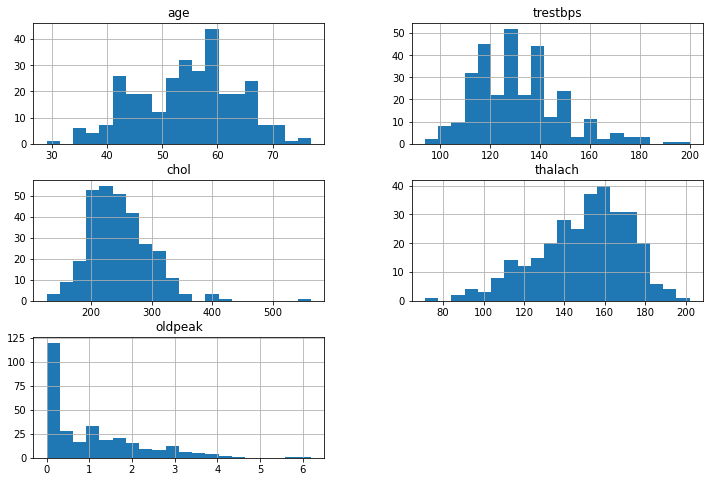

In [13]:
df[num].hist(figsize=(12,8),bins=20);

**Checking value counts of categorical columns**

In [14]:
for i in cat:
    print("="*30)
    print(df[i].value_counts())
    print("="*30)

1    206
0     96
Name: sex, dtype: int64
0    143
2     86
1     50
3     23
Name: cp, dtype: int64
0    257
1     45
Name: fbs, dtype: int64
1    151
0    147
2      4
Name: restecg, dtype: int64
0    203
1     99
Name: exang, dtype: int64
2    141
1    140
0     21
Name: slope, dtype: int64
2    165
3    117
1     18
0      2
Name: thal, dtype: int64


**Showing the value counts of categorical columns by target column on the chart**

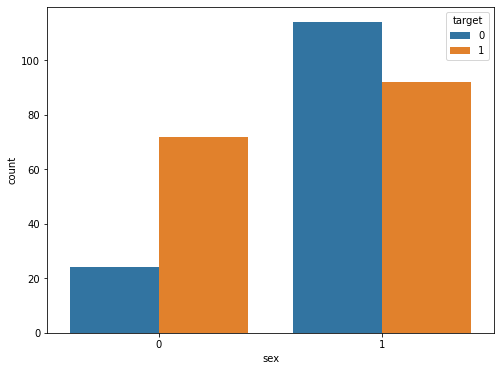

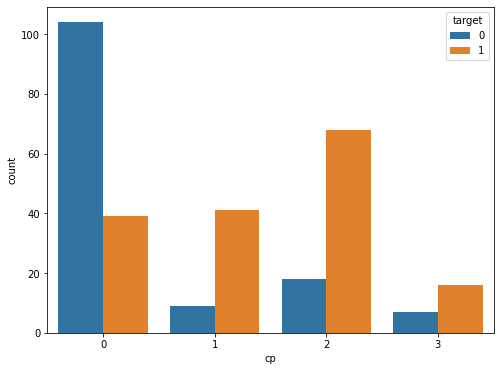

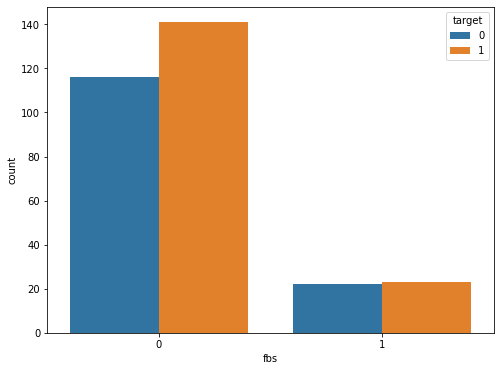

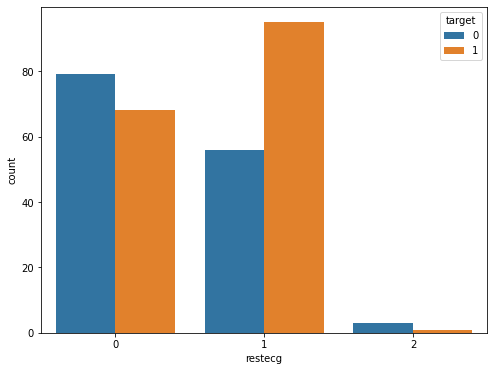

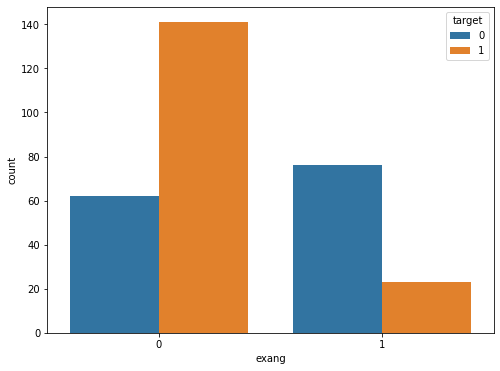

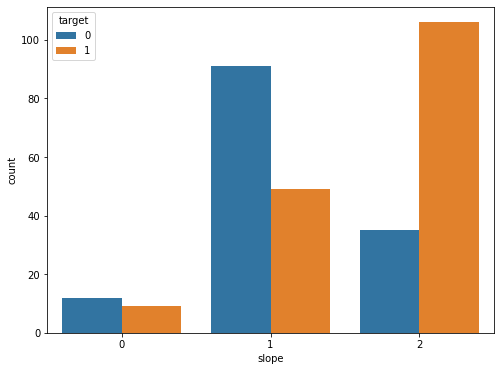

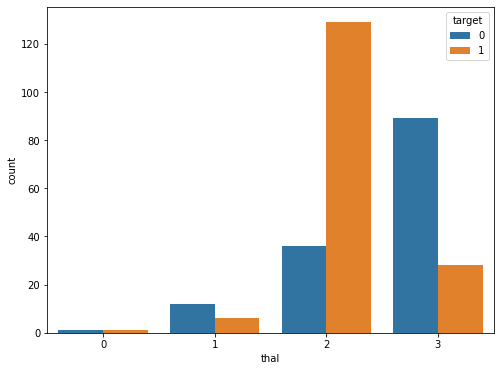

In [15]:
for i in cat:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=i, hue="target")

#### We examined the numerical columns on the boxplot. 
**Although there are some outlier data, we did not delete the outlier data here because there may be such values in the health data.**

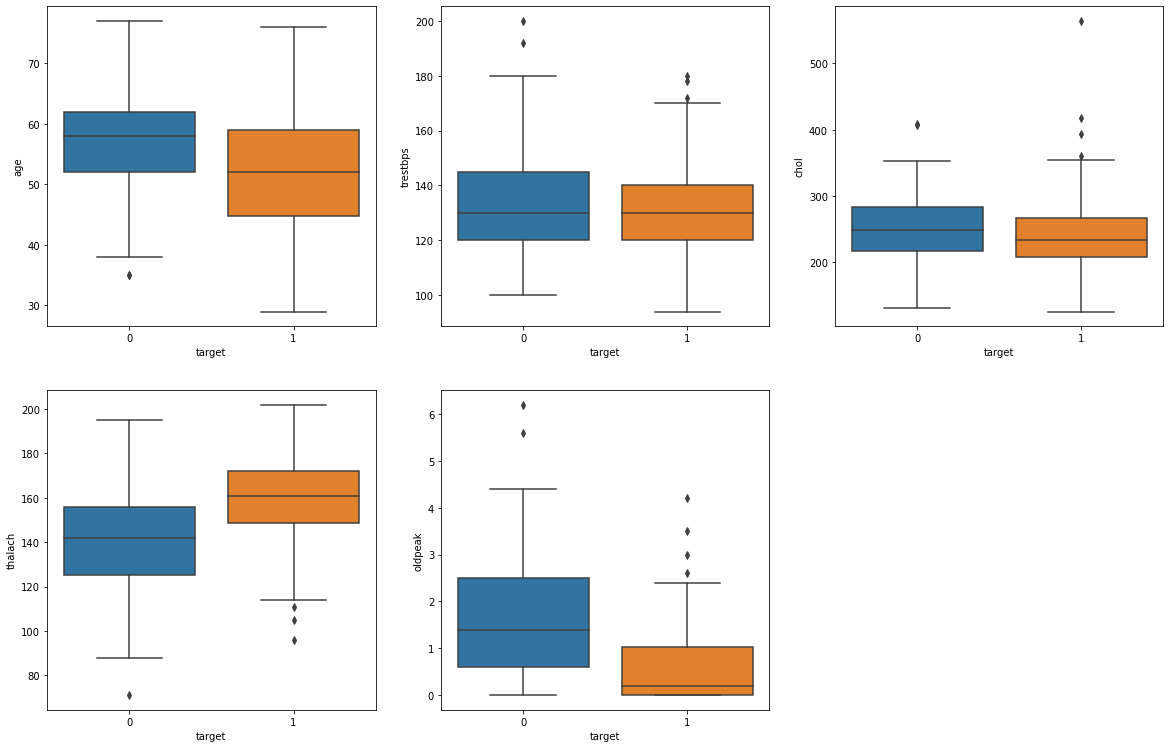

In [16]:
index = 0
plt.figure(figsize=(20,20))
for feature in df[num]:
    if feature != "target":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='target',y=feature,data=df)

### We examine the "target" column

In [17]:
y = df['target']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)')
print(f'Percentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 54.3 --> (164 patient)
Percentage of patient did not have a stroke: % 45.7 --> (138 patient)


**Our data seems balanced.**

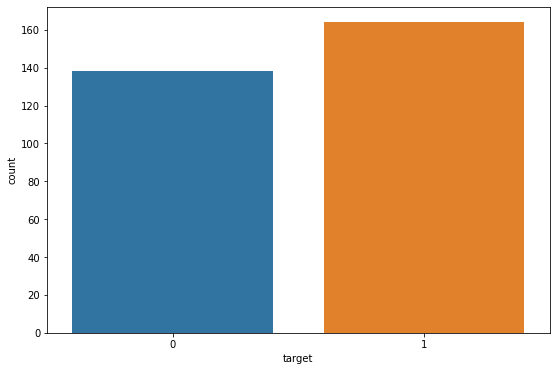

In [18]:
sns.countplot(df["target"]);

**We examined the correlation of the features according to the target column**

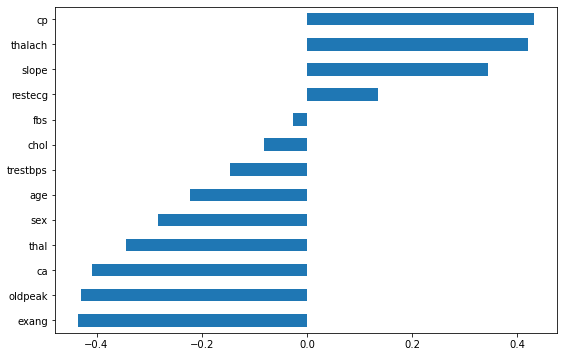

In [19]:
df.corr()["target"].drop("target").sort_values().plot.barh();

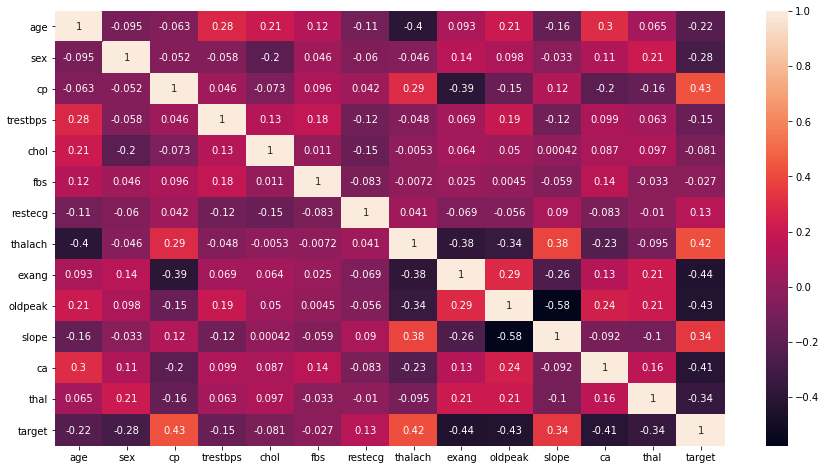

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True);

# Data Preprocessing

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [76]:
X = df.drop('target',axis=1)
y = df['target']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### With Default Parameters

In [80]:
log_model = LogisticRegression(class_weight = "balanced")
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [81]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
269,56,1,0,130,283,1,0,103,1,1.600,0,0,3,0,0,0.040
292,58,0,0,170,225,1,0,146,1,2.800,1,2,1,0,0,0.197
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0,0,0.092
60,71,0,2,110,265,1,0,130,0,0.000,2,1,2,1,1,0.895
77,59,1,1,140,221,0,1,164,1,0.000,2,0,2,1,1,0.565
178,43,1,0,120,177,0,0,120,1,2.500,1,0,3,0,0,0.074
152,64,1,3,170,227,0,0,155,0,0.600,1,0,3,1,1,0.545
137,62,1,1,128,208,1,0,140,0,0.000,2,0,2,1,1,0.722
93,54,0,1,132,288,1,0,159,1,0.000,2,1,2,1,1,0.699
92,52,1,2,138,223,0,1,169,0,0.000,2,4,2,1,0,0.466


In [82]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  5]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.87      0.83      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



### Cross Validate

In [83]:
from sklearn.model_selection import cross_validate

In [84]:
model = LogisticRegression(class_weight = "balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.837
test_precision_weighted   0.848
test_recall_weighted      0.837
test_f1_weighted          0.835
dtype: float64

### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [85]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

**Our model predicted 1s in test data with a rate of 93%**

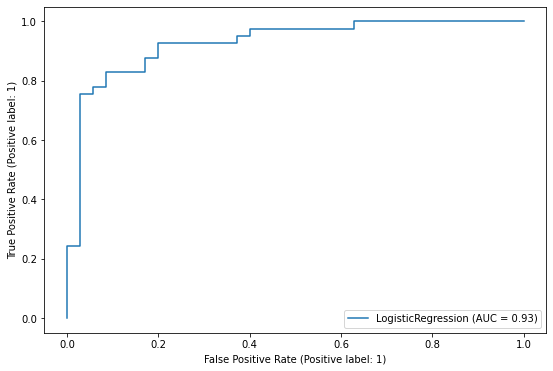

In [86]:
plot_roc_curve(log_model, X_test_scaled, y_test);

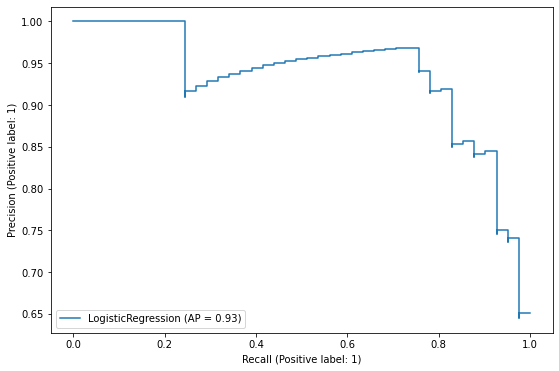

In [87]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

**The values on the train and test data are almost the same. No overfitting or underfitting**

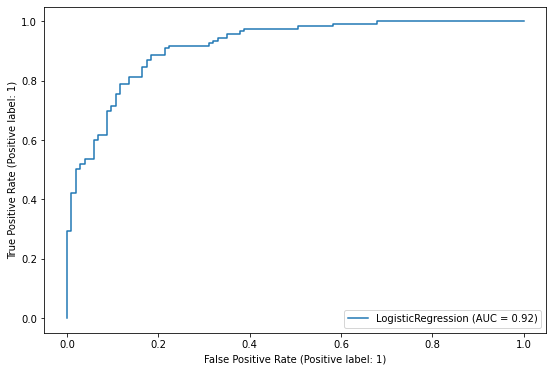

In [88]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [89]:
y_pred_proba = log_model.predict_proba(X_train_scaled) # Train datasından proba değerini aldık
roc_auc_score(y_train, y_pred_proba[:,1]) # AUC değrerini böyle hesaplıyoruz

0.9172783960849317

In [90]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [91]:
optimal_idx = np.argmax(tp_rate - fp_rate) # argmax bu array içindeki max değerin indexini verir
optimal_threshold = thresholds[optimal_idx] # bu indexi threshold değerinde yerine yazark optimum th değerini buldum
optimal_threshold

0.48986292295896866

**Our th value is almost 0.5. When we re-estimate with this value, we will see that there is no change in the results**

In [92]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)
y_pred2 = test_data["pred2"]

In [93]:
test_data[(test_data["pred_proba"]>0.4) & (test_data["pred_proba"]<0.6)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2
119,46,0,0,138,243,0,0,152,1,0.000,1,0,2,1,0,0.468,0
5,57,1,0,140,192,0,1,148,0,0.400,1,0,1,1,1,0.595,1
152,64,1,3,170,227,0,0,155,0,0.600,1,0,3,1,1,0.545,1
283,40,1,0,152,223,0,1,181,0,0.000,2,0,3,0,1,0.598,1
73,51,1,0,140,261,0,0,186,1,0.000,2,0,2,1,0,0.404,0
199,65,1,0,110,248,0,0,158,0,0.600,2,2,1,0,0,0.465,0
92,52,1,2,138,223,0,1,169,0,0.000,2,4,2,1,0,0.466,0
77,59,1,1,140,221,0,1,164,1,0.000,2,0,2,1,1,0.565,1
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0,1,0.580,1
194,60,1,2,140,185,0,0,155,0,3.000,1,0,2,0,1,0.510,1


In [94]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[30  5]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.87      0.83      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [95]:
y_pred2 = test_data["pred2"]

In [96]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[30  5]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.87      0.83      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



# Implement KNN and Evaluate

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled,y_train)
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [99]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [100]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
139,1,0,0.000,1.000
59,1,1,0.800,0.200
132,1,1,1.000,0.000
252,0,0,0.400,0.600
283,0,1,0.800,0.200
232,0,0,0.000,1.000
152,1,0,0.400,0.600
285,0,0,0.000,1.000
177,0,1,0.800,0.200
22,1,1,1.000,0.000


In [101]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  5]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.87      0.80      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



### Elbow Method for Choosing Reasonable K Values

In [102]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

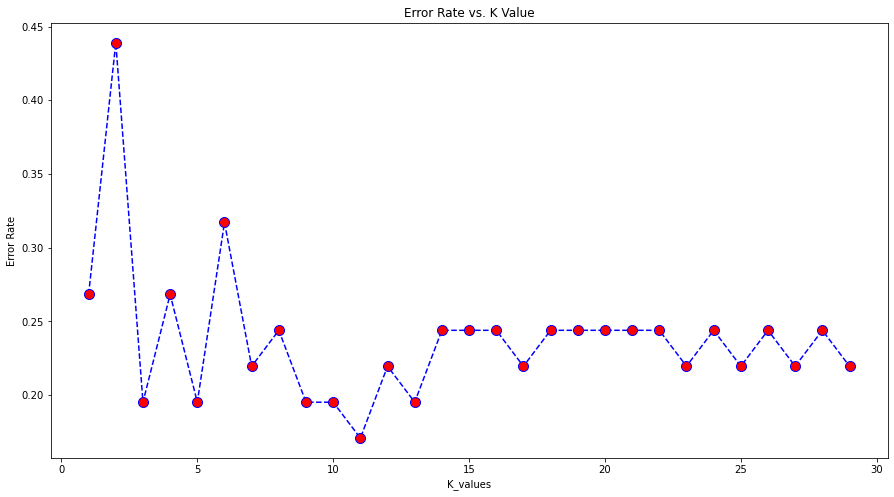

In [103]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
# Amaç kabul edilebilir hata oranına göre en küçük k değerini seçmek

In [104]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[30  5]
 [11 30]]


              precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.86      0.73      0.79        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



In [105]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=5


[[30  5]
 [ 8 33]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.87      0.80      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [106]:
# NOW WITH K=11
knn_optimal = KNeighborsClassifier(n_neighbors=11)

knn_optimal.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=11


[[30  5]
 [ 8 33]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.87      0.80      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



## Cross Validate For Optimal K Value

In [107]:
model = KNeighborsClassifier(n_neighbors=11)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.783
test_precision   0.784
test_recall      0.837
test_f1          0.808
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

In [108]:
knn_grid = KNeighborsClassifier()
k_values= range(1,30)

In [109]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'recall')

In [110]:
knn_grid_model.fit(X_train_scaled, y_train)
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

In [111]:
knn_grid_optimal = KNeighborsClassifier(n_neighbors=11, p =1, weights='uniform')

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=11


[[30  5]
 [ 8 33]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.87      0.80      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [113]:
knn_grid_optimal = KNeighborsClassifier(n_neighbors=11, p =1, weights='uniform').fit(X_train_scaled, y_train)

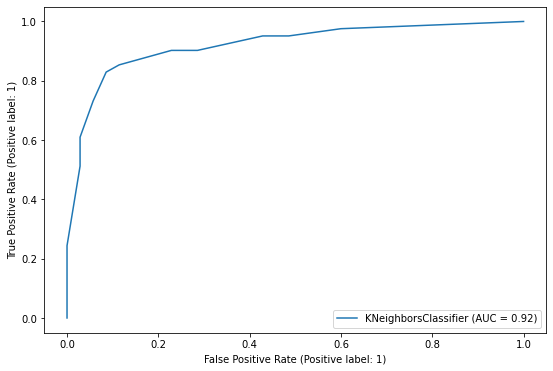

In [114]:
plot_roc_curve(knn_grid_optimal, X_test_scaled, y_test);

# Implement SVM and Evaluate

In [115]:
from sklearn.svm import SVC

In [116]:
svm_model_scaled = SVC()
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred = svm_model_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  5]
 [ 8 33]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.87      0.80      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



### Cross Validation

In [117]:
model = SVC(random_state=42)
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.836
test_precision   0.845
test_recall      0.870
test_f1          0.854
dtype: float64

### With Best Parameters (GridsearchCV)

In [118]:
param_grid = {'C': [0.1,1, 10, 100, 1000, 5000, 10000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [119]:
model = SVC(random_state=42)
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [120]:
svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=aut

[CV 2/5] END ..................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ...............C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ...............C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

[CV 3/5] END ...............C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END ...............C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C

[CV 1/5] END ..............C=5000, gamma=auto, kernel=linear; total time=   0.3s
[CV 2/5] END ..............C=5000, gamma=auto, kernel=linear; total time=   0.2s
[CV 3/5] END ..............C=5000, gamma=auto, kernel=linear; total time=   0.4s
[CV 4/5] END ..............C=5000, gamma=auto, kernel=linear; total time=   0.3s
[CV 5/5] END ..............C=5000, gamma=auto, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=5000, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=5000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=5000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=5000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=5000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=5000, gamma=1, kernel=linear; total time=   0.3s
[CV 2/5] END .................C=5000, gamma=1, kernel=linear; total time=   0.2s
[CV 3/5] END ...............

[CV 3/5] END .............C=10000, gamma=0.01, kernel=linear; total time=   0.6s
[CV 4/5] END .............C=10000, gamma=0.01, kernel=linear; total time=   1.5s
[CV 5/5] END .............C=10000, gamma=0.01, kernel=linear; total time=   0.2s
[CV 1/5] END ...............C=10000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............C=10000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............C=10000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............C=10000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............C=10000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ............C=10000, gamma=0.001, kernel=linear; total time=   0.7s
[CV 2/5] END ............C=10000, gamma=0.001, kernel=linear; total time=   0.3s
[CV 3/5] END ............C=10000, gamma=0.001, kernel=linear; total time=   0.7s
[CV 4/5] END ............C=10000, gamma=0.001, kernel=linear; total time=   1.6s
[CV 5/5] END ............C=1

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 5000, 10000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [121]:
svm_model_grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

In [122]:
svm_model_grid.best_estimator_

SVC(C=100, kernel='linear', random_state=42)

In [123]:
y_pred = svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  6]
 [ 7 34]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



# Visually compare models based on your chosen metric

In [124]:
log_model = LogisticRegression(class_weight="balance")
knn_model = KNeighborsClassifier(n_neighbors=11, p=1, weights="uniform")
svc_model = SVC(random_state=42, probability=True, C=100, kernel="linear", gamma="scale")

models=[knn_model,log_model,svc_model]
names=['LogisticRegression','KNeighboursClassifiers','SVC']

In [155]:
def model_test(X,y,models=models, names=names):
    for i in range(len(models)):
        models[i]=models[i].fit(X,y)
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    for i in range(len(models)):
        accuracy.append(accuracy_score(y,models[i].predict(X)))
        
        precision.append(precision_score(y, models[i].predict(X)))
        
        recall.append(recall_score(y, models[i].predict(X)))
        
        f1.append(f1_score(y, models[i].predict(X)))
        
    metrics=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
    metrics['Accuracy']= accuracy
    metrics['Precision']= precision
    metrics['Recall']= recall
    metrics['F1']= f1
    return metrics.sort_values('Recall',ascending=False) 

In [156]:
model_test(X_train_scaled,y_train)

,Accuracy,Precision,Recall,F1
SVC,0.867,0.860,0.902,0.881
KNeighboursClassifiers,0.845,0.833,0.894,0.863
LogisticRegression,0.845,0.838,0.886,0.862


In [157]:
 model_test(X_test_scaled,y_test)

,Accuracy,Precision,Recall,F1
LogisticRegression,0.868,0.830,0.951,0.886
KNeighboursClassifiers,0.895,0.867,0.951,0.907
SVC,0.895,0.884,0.927,0.905


# Chose best model and make a random prediction 

In [144]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [145]:
final_model = KNeighborsClassifier(n_neighbors=11).fit(X_scaled, y)

In [146]:
import pickle
pickle.dump(scaler, open("scaler_model", 'wb'))
pickle.dump(final_model, open("final_model", 'wb'))

In [147]:
my_dict = {"age": [18,43,67,24,79],
           "sex":[0,0,1,1,0],
           "cp":[0,1,1,3,2],
           "trestbps": [90,110,130,80,120],
           "chol": [202,244,269,212,224],
           "fbs": [1,1,0,1,0],
           "restecg": [0,1,1,0,0],
           "thalach": [154,167,142,179,191],
           "exang": [0,1,0,1,1],
           "oldpeak": [0.90,1.40,2.20,1.70,1.10],
           "slope": [1,0,0,2,1],
           "ca": [1,0,3,4,2],
           "thal": [0,3,1,2,1]
          }

In [148]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,18,0,0,90,202,1,0,154,0,0.900,1,1,0
1,43,0,1,110,244,1,1,167,1,1.400,0,0,3
2,67,1,1,130,269,0,1,142,0,2.200,0,3,1
3,24,1,3,80,212,1,0,179,1,1.700,2,4,2
4,79,0,2,120,224,0,0,191,1,1.100,1,2,1


In [149]:
scaler= pickle.load(open("scaler_model", "rb"))

In [150]:
sample_scaled = scaler.transform(sample)

In [151]:
final_model = pickle.load(open("final_model", "rb"))

In [152]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [154]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_proba,pred
0,18,0,0,90,202,1,0,154,0,0.900,1,1,0,0.818,1
1,43,0,1,110,244,1,1,167,1,1.400,0,0,3,0.182,0
2,67,1,1,130,269,0,1,142,0,2.200,0,3,1,0.455,0
3,24,1,3,80,212,1,0,179,1,1.700,2,4,2,0.455,0
4,79,0,2,120,224,0,0,191,1,1.100,1,2,1,0.545,1
